In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline  

import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sys.path.append('..')
from utils import *
from data import *
from plotting import *
from experiments import top_k_split

In [6]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')

Data shape: (502439, 37)
Droping NANs: 403753 (80.36%) left
Removing errors bigger than 1: 266766 (53.09%) left
Removing limiting magnitudes: 109011 (21.70%) left
Removing IMA flags: 89450 (17.80%) left


In [7]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (91317, 49)
Droping NANs: 89513 (98.02%) left
Removing errors bigger than 1: 84491 (92.52%) left
Removing limiting magnitudes: 74191 (81.25%) left
Removing IMA flags: 55787 (61.09%) left
Cleaning SDSS: 52010 left


In [8]:
print(describe_column(kids_x_sdss['CLASS']))

GALAXY - 32582 (62.65%)
QSO - 7265 (13.97%)
STAR - 12163 (23.39%)


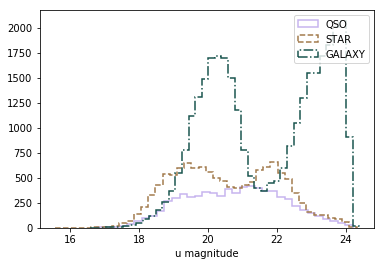

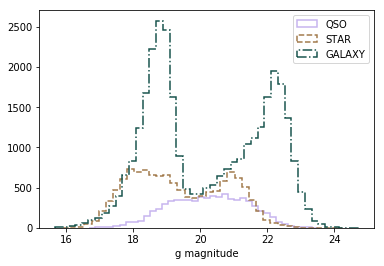

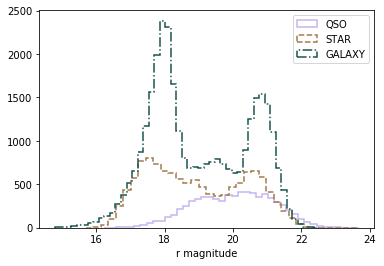

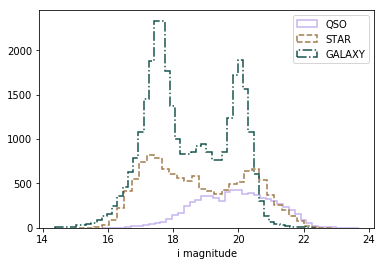

In [6]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

IndexError: list index out of range

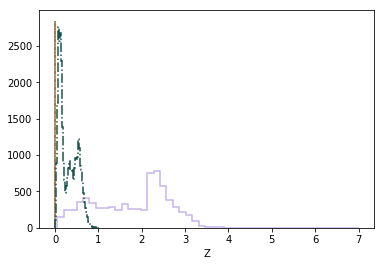

In [7]:
plot_class_histograms(kids_x_sdss, ['Z'])

## random

In [11]:
kids_train, kids_test = train_test_split(kids_x_sdss, test_size=0.2, random_state=427)

In [12]:
print(describe_column(kids_train['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([26045,  5771,  9792]), array([ 62.59613536,  13.86992886,  23.53393578]))


In [13]:
print(describe_column(kids_test['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([6537, 1494, 2371]), array([ 62.84368391,  14.36262257,  22.79369352]))


## top magnitude

In [16]:
_, _, kids_train, kids_test = top_k_split(kids_x_sdss[MAG_GAAP_CALIB_R], kids_x_sdss, test_size=0.2)

/home/snakoneczny/workspace/kids_quasars/exp_test_methods.py:51: FutureWarning: Series.flags is deprecated and will be removed in a future version
  indices = indices if indices.flags.writeable else indices.copy()


In [17]:
print(describe_column(kids_train['CLASS']))
print(describe_column(kids_test['CLASS']))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([29737,  5809, 11263]), array([ 63.52838129,  12.41000662,  24.06161208]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2845, 1456,  900]), array([ 54.70101903,  27.99461642,  17.30436455]))
